In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def prob(z, r, T):
    """Create a function similar to likelihood fn of x_i, sigma^2 for Kalman smoothing
    
    Attributes:
        z: measured value of x_i
        r: inverse variance of measurement
        T: number of timesteps
    """
    return lambda x, sigma: np.exp(-1/2 * (r*(x-z)**2 + x ** 2/sigma + T*np.log(sigma)))

def inverse_gamma(a, b):
    """Create a function similar to pdf of inverse gamma
    
    Attributes:
        a: shape-like param
        b: scale-like param
    """
    return lambda sigma: sigma**(-a-1)* np.exp(-b/sigma)

In [3]:
# plot data parameters and series
z = 2
r = 1.5
T = 1
a = 1.9
b = 1.6
psurface = np.vectorize(prob(z, r, T))
sigma_of_x = np.vectorize(lambda x: x**2/T)
sigma_of_x_map = np.vectorize(lambda x: (x**2 + b)/(T+1+a))
p_prior = np.vectorize(inverse_gamma(a, b))

x_min = .1
x_max = 2
sigma_min = sigma_of_x(x_min)
sigma_max = sigma_of_x(x_max)

n = 30
# x_steps = np.linspace(x_min, x_max, n)
x_steps = np.logspace(np.log(x_min), 1, n, base=np.e)
# sigma_steps = np.logspace(np.log(sigma_min), 1, n, base=np.e)
# sigma_steps = np.linspace(sigma_min, sigma_max, n)
argmax_sigma = sigma_of_x(x_steps)
argmax_sigma_map = sigma_of_x_map(x_steps)
sigma_steps = argmax_sigma
sigma_steps_map = argmax_sigma_map
sigma_lattice, x_lattice = np.meshgrid(sigma_steps, x_steps)
prior_values = p_prior(sigma_steps)
sigma_lattice_map, x_lattice_map = np.meshgrid(sigma_steps_map, x_steps)
map_func = lambda x, sigma: inverse_gamma(1.9, 1.6)(sigma) * prob(z, r, T)(x, sigma)
z_map_1d = [map_func(x, y) for x,y in zip(x_steps, sigma_steps_map)]


[Text(0.0, 0, ''),
 Text(0.02, 0, ''),
 Text(0.04, 0, ''),
 Text(0.06, 0, ''),
 Text(0.08, 0, ''),
 Text(0.1, 0, '')]

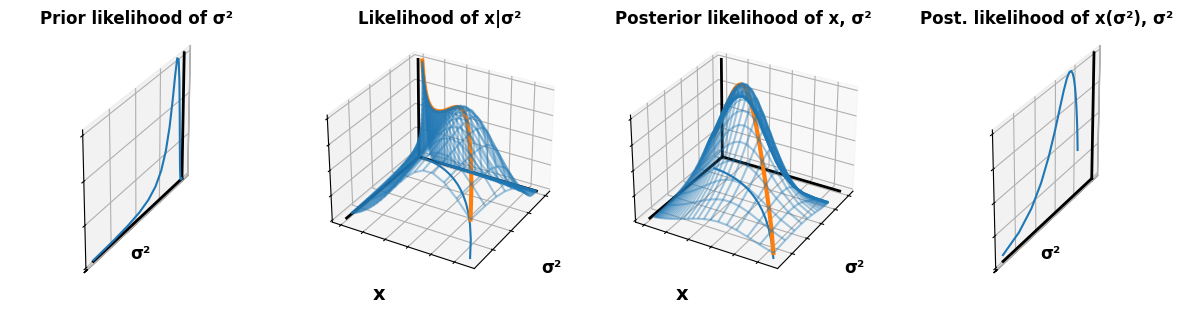

In [7]:
fig = plt.figure(figsize=[15,7])
# 3dplot parameters
transparency = .4
rotation = 30
partial_w = 3

# plot sigma on the "x" axis and x on the "y" axis 
ax1 = sigma_lattice
ax1_vals = sigma_steps
ax1_label = "\u03C3\u00B2"
ax2 = x_lattice
ax2_vals = x_steps
ax2_label = "x"
ax1_partial = argmax_sigma
ax2_partial = x_steps
ax1_map = sigma_lattice_map
ax1_vals_map = sigma_steps_map
ax2_map = x_lattice_map
ax1_partial_map = argmax_sigma_map
# These may implicitly set axis orientation of x and sigma. 
# reorienting x and sigma requires potentially 
argmax_p = psurface(x_steps, argmax_sigma)
z_likelihood = psurface(x_lattice, sigma_lattice)
z_map = np.vectorize(map_func)(x_lattice_map, sigma_lattice_map)

# plot 1
ax = fig.add_subplot(1, 4, 1, projection='3d', azim=rotation, box_aspect=(4, .01, 3))
ax.set_title("Prior likelihood of \u03C3\u00B2", weight="semibold", size=12)
ax.plot([0, ax1.max()], [0,0], [0,0], color="black", linewidth=2)
ax.plot([0,0], [0,0], [0, prior_values.max()], color="black", linewidth=2)
ax.plot(ax1_vals, np.zeros_like(ax1_vals), prior_values)
ax.set_ylabel(ax2_label, weight="semibold", size=14)
ax.set_xlabel(ax1_label, weight="semibold", size=12)
ax.set_xticklabels(())
ax.set_yticklabels(())
ax.set_zticklabels(())


# plot 2
ax = fig.add_subplot(1, 4, 2, projection='3d', azim=rotation)
ax.set_title("Likelihood of x|\u03C3\u00B2", weight="semibold", size=12)
ax.plot([0, ax1.max()], [0,0], [0,0], color="black", linewidth=2)
ax.plot([0,0], [0,ax2.max()], [0,0], color="black", linewidth=2)
ax.plot([0,0], [0,0], [0, z_likelihood.max()], color="black", linewidth=2)
ax.plot_wireframe(ax1, ax2, z_likelihood, alpha=transparency)
ax.set_ylabel("x", weight="semibold", size=14)
ax.set_xlabel("\u03C3\u00B2", weight="semibold", size=12)
ax.set_xticklabels(())
ax.set_yticklabels(())
ax.set_zticklabels(())
ax.plot(ax1_partial, ax2_partial)
ax.plot(ax1_partial, ax2_partial, argmax_p, linewidth=partial_w)

# Plot 3
ax = fig.add_subplot(1, 4, 3, projection="3d", azim=rotation)
ax.set_title("Posterior likelihood of x, \u03C3\u00B2", weight="semibold", size=12)
ax.plot([0, ax1_map.max()], [0,0], [0,0], color="black", linewidth=2)
ax.plot([0,0], [0,ax2_map.max()], [0,0], color="black", linewidth=2)
ax.plot([0,0], [0,0], [0, z_map.max()], color="black", linewidth=2)
ax.plot_wireframe(ax1_map, ax2_map, z_map, alpha=transparency)
ax.plot(ax1_partial_map, ax2_partial)
ax.plot(ax1_partial_map, ax2_partial, z_map_1d, linewidth=partial_w)
ax.set_ylabel("x", weight="semibold", size=14)
ax.set_xlabel("\u03C3\u00B2", weight="semibold", size=12)
ax.set_xticklabels(())
ax.set_yticklabels(())
ax.set_zticklabels(())

# Plot 4
ax = fig.add_subplot(1, 4, 4, projection="3d", azim=rotation, box_aspect=(4, .01, 3))
ax.set_title("Post. likelihood of x(\u03C3\u00B2), \u03C3\u00B2", weight="semibold", size=12)
ax.plot([0, ax1_partial_map.max()], [0,0], [0,0], color="black", linewidth=2)
ax.plot([0,0], [0,0], [0, max(z_map_1d)], color="black", linewidth=2)
ax.plot(ax1_vals_map, np.zeros_like(ax1_vals_map), z_map_1d)
ax.set_xlabel("\u03C3\u00B2", weight="semibold", size=12)
ax.set_xticklabels(())
ax.set_yticklabels(())
ax.set_zticklabels(())



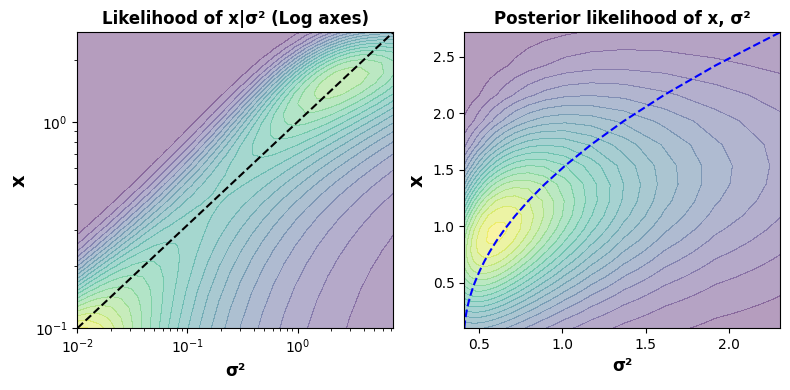

In [5]:
fig = plt.figure(figsize=[8,4])
# 3dplot parameters
transparency = .4
rotation = 30
partial_w = 3

# plot 1
ax = fig.add_subplot(1, 2, 1)
ax.set_title("Likelihood of x|\u03C3\u00B2 (Log axes)", weight="semibold", size=12)
ax.contourf(ax1, ax2, z_likelihood, alpha=transparency, levels=20)
ax.set_ylabel("x", weight="semibold", size=14)
ax.set_xlabel("\u03C3\u00B2", weight="semibold", size=12)
ax.set_xticklabels(())
ax.set_yticklabels(())
# ax.set_zticklabels(())
ax.plot(ax1_partial, ax2_partial, "k--")
# ax.plot(ax1_partial, ax2_partial, argmax_p, linewidth=partial_w)
ax.set_xscale("log")
ax.set_yscale("log")

# Plot 2
ax = fig.add_subplot(1, 2, 2)
ax.set_title("Posterior likelihood of x, \u03C3\u00B2", weight="semibold", size=12)
ax.contourf(ax1_map, ax2_map, z_map, alpha=transparency, levels=20)
ax.plot(ax1_partial_map, ax2_partial, "b--")
# ax.plot(ax1_partial, ax2_partial, z_map_1d, linewidth=partial_w)
ax.set_ylabel("x", weight="semibold", size=14)
ax.set_xlabel("\u03C3\u00B2", weight="semibold", size=12)
# ax.set_xticklabels(())
# ax.set_yticklabels(())
# ax.set_xscale("log")
# ax.set_yscale("log")

fig.tight_layout()